In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nilearn 

from nilearn import image
from pathlib import Path

In [ ]:
subjects = ['06', '15','19', '21', '22', '08', '09', '11', '12', '16', '24']
all_sub_top_indices = []

# fig, axs = plt.subplots(3, 5, figsize=(16, 12))

# # Flatten the subplot array for easy iteration
# axs_flat = axs.flatten()

for i, subject in enumerate(subjects):
    nc_file = Path(f'E:/fmri_processing/results/visualization/sub-{subject}/sub-{subject}_nc_volume.nii.gz')
    nc = image.load_img(nc_file).get_fdata()

    nc_flat = nc.flatten()

    ind_1d = nc_flat.argsort()[-1000:]
    ind_x, ind_y, ind_z = np.unravel_index(ind_1d, nc.shape)
    top_indices = np.column_stack((ind_x, ind_y, ind_z))

    plt.figure(figsize=(8, 6))
    plt.hist(top_indices[:, 1], bins=10, label=f'Subject {subject}')
    plt.title(f'Posterior to Anterior Voxel Count', fontsize=16)
    plt.xlabel('Voxel Position', fontsize=16)
    plt.ylabel('Number of Voxels', fontsize=16)
    plt.legend()

    plt.savefig(f'E:/fmri_processing/results/visualization/sub-{subject}/sub-{subject}_histogram_10res_top256.png')
    plt.show()
    plt.close()


#     axs_flat[i].hist(top_indices[:, 1], bins=10, label=f'Subject {subject}')
#     # axs_flat[i].hist(top_indices[:, 1], bins=10, label=f'Subject {subject}', range=[15, 80])
#     axs_flat[i].set_title(f'Histogram of voxel on anterior-posterior axis (lower = further back)')
#     axs_flat[i].set_xlabel('Voxel Position')
#     axs_flat[i].set_ylabel('Number of Voxels')
#     axs_flat[i].legend()

#     # Store top indices for later use if needed
#     all_sub_top_indices.append(top_indices)

# # Adjust layout for better spacing between subplots
# plt.tight_layout()

# # Show the plots
# plt.show()

1st dimension (left-to-right), lowest = left, highest = right
2nd dimension (anterior-posterior), lowest = back of brain, highest = front
3rd dimension (rostral-caudal), lowest = bottom, highest = top

In [38]:
# subjects = ['06', '15','19', '21', '22', '08', '09', '11', '12', '16', '24']

# subjects = ['06', '15','19', '20', '21', '22', '23']
# subjects = ['06', '15','19', '21', '22']

subjects = ['08', '09', '11', '12', '16']

counts_list = []

for i, subject in enumerate(subjects):
    nc_file = Path(f'E:/fmri_processing/results/visualization/sub-{subject}/sub-{subject}_nc_volume.nii.gz')
    nc = image.load_img(nc_file).get_fdata()

    nc_flat = nc.flatten()

    ind_1d = nc_flat.argsort()[-1012:]
    ind_x, ind_y, ind_z = np.unravel_index(ind_1d, nc.shape)
    top_indices = np.column_stack((ind_x, ind_y, ind_z))

    # Compute histogram-like count values
    counts, edges = np.histogramdd(top_indices[:,1], bins=10)
    counts_list.append(counts)

average_counts = np.mean(counts_list, axis=0)
average_counts = [round(avg,2) for avg in average_counts]
print(f'{subjects=}')
print(f'{average_counts=}')

subjects=['08', '09', '11', '12', '16']
average_counts=[446.6, 223.8, 68.2, 55.8, 46.0, 56.6, 44.6, 35.6, 22.0, 12.8]


In [ ]:
# top 1012
# subjects=['06', '15', '19', '20', '21', '22', '23'] 
# average_counts=[370.0, 267.14, 77.71, 59.14, 56.57, 60.86, 50.29, 31.57, 24.14, 14.57]

# top 1012
# subjects=['06', '15', '19', '21', '22']
# average_counts=[450.8, 302.6, 65.2, 39.2, 37.0, 39.0, 30.8, 24.8, 14.0, 8.6]

# top 1012
# subjects=['08', '09', '11', '12', '16']
# average_counts=[446.6, 223.8, 68.2, 55.8, 46.0, 56.6, 44.6, 35.6, 22.0, 12.8]


# top 256
# subjects=['06', '15', '19', '20', '21', '22', '23'] 
# average_counts=[91.0, 89.57, 40.14, 10.57, 7.57, 3.86, 5.57, 3.29, 1.57, 2.86]

# top 256
# subjects=['06', '15', '19', '21', '22']
# average_counts=[101.6, 100.2, 39.4, 8.2, 4.4, 0.2, 0.6, 0.4, 0.0, 1.0]

# top 256
# subjects=['08', '09', '11', '12', '16']
# average_counts=[99.0, 69.0, 31.8, 25.2, 8.2, 9.6, 4.4, 3.0, 3.0, 2.8]

In [15]:
print(
        np.array([446.6, 223.8, 68.2, 55.8, 46.0, 56.6, 44.6, 35.6, 22.0, 12.8]) 
      - np.array([370.0, 267.14, 77.71, 59.14, 56.57, 60.86, 50.29, 31.57, 24.14, 14.57])
      )

[ 76.6  -43.34  -9.51  -3.34 -10.57  -4.26  -5.69   4.03  -2.14  -1.77]


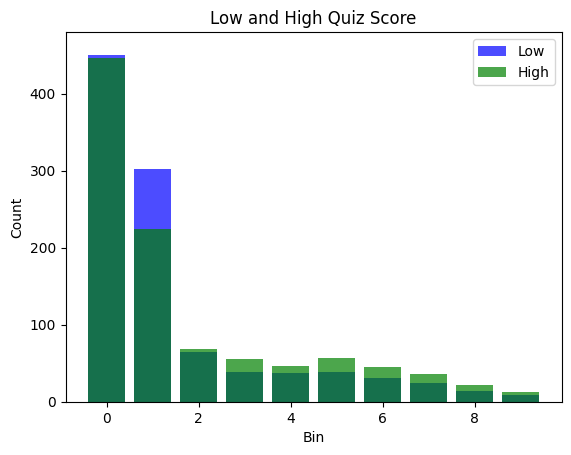

In [44]:
plt.bar(range(10), np.array([450.8, 302.6, 65.2, 39.2, 37.0, 39.0, 30.8, 24.8, 14.0, 8.6]), color='blue', label='Low', alpha=0.7)
plt.bar(range(10), np.array([446.6, 223.8, 68.2, 55.8, 46.0, 56.6, 44.6, 35.6, 22.0, 12.8]), color='green', label='High', alpha=0.7)
plt.title("Low and High Quiz Score")
plt.xlabel("Bin")
plt.ylabel("Count")
plt.ylim(0, 480)
plt.legend()
plt.show()

Do this for the 10 subjects, 5 low scoring, 5 high scoring. 
Plot them together in a (5,2) plot and we can compare if there is a difference or not